In [1]:
from src.densite_function import *
from src.gaussian_simulation import *
from src.estimators import *
from src.vraisemblance import *
import numpy as np
from numpy.linalg import norm 
import matplotlib.pylab as plt

# Préalable

On tire $\mathbf{x}$ et $\theta$ au hasard dans $\mathbb{R}^{20}$ et on fixe les paramètres $A$ et $b$ optimaux.

In [2]:
np.random.seed(8878)

x=np.random.uniform(size=20, low=-10, high=10)
theta=np.random.uniform(size=20, low=-10, high=10)

A=np.matrix(np.identity(20))*0.5
b=theta/2

# Estimateurs de la log-vraisemblance

## Comparaison entre estimateurs et vraie log-vraisemblance au point x

On prend $k=100$ pour l'estimateur IAWE.

In [3]:
np.random.seed(589)
print("Vraie valeur de la log-vraisemblance au point x: {}".format(np.around(log_vraisemblance(x, theta), decimals=2)))
print("Estimateur IAWE de la log-vraisemblance: {}".format(np.around(importance_sampling_logvraisemblance(k=100, theta=theta, A=A, b=b, x=x), decimals=2)))
print("Estimateur SUMO de la log-vraisemblance: {}".format(np.around(estimateur_SUMO_logvraisemblance(theta=theta, A=A, b=b, x=x, r=0.6), decimals=2)))
print("Estimateur ML-SS de la log-vraisemblance: {}".format(np.around(estimateur_ML_SS_logvraisemblance(x, theta, A, b, r=0.6), decimals=2)))
print("Estimateur ML-RR de la log-vraisemblance: {}".format(np.around(estimateur_ML_RR_logvraisemblance(x, theta, A, b, r=0.6), decimals=2)))

Vraie valeur de la log-vraisemblance au point x: -225.49
Estimateur IAWE de la log-vraisemblance: -225.46
Estimateur SUMO de la log-vraisemblance: -225.63
Estimateur ML-SS de la log-vraisemblance: -226.03
Estimateur ML-RR de la log-vraisemblance: -225.67


## Procédure de Monte Carlo

Pour estimer le biais et la variance des estimateurs, on fait M répétitions de Monte Carlo. 
Pour m=1,...,M, on calcule chaque estimateur au point $\mathbb{x}$.
Puis on retourne:

\begin{equation}

    biais_M=\frac{1}{M} \sum_{m=1}^{M} estimateur_m - l(x;\theta)

\end{equation}

\begin{equation}

    Var_M=\frac{1}{M} \sum_{m=1}^{M}( estimateur_m - \frac{1}{M} \sum_{m=1}^{M} estimateur_m)^{2}

\end{equation}

On prend $k=100$ pour l'estimateur IWAE.

In [4]:
def procedure_MC_logvraisemblance(M, k, x, theta, A, b):
    m=0
    estimations_IWAE=np.array([])
    estimations_SUMO=np.array([])
    estimations_SS=np.array([])
    estimations_RR=np.array([])


    while m<M:
        log_vraisemblance_estim_IWAE=importance_sampling_logvraisemblance(k=k, theta=theta, A=A, b=b, x=x)
        log_vraisemblance_estim_SUMO=estimateur_SUMO_logvraisemblance(theta=theta, A=A, b=b, x=x, r=0.6)
        log_vraisemblance_estim_SS=estimateur_ML_SS_logvraisemblance(theta=theta, A=A, b=b, x=x, r=0.6)
        log_vraisemblance_estim_RR=estimateur_ML_RR_logvraisemblance(theta=theta, A=A, b=b, x=x, r=0.6)


        estimations_IWAE= np.append(estimations_IWAE, log_vraisemblance_estim_IWAE)
        estimations_SUMO=np.append(estimations_SUMO, log_vraisemblance_estim_SUMO)
        estimations_SS=np.append(estimations_SS, log_vraisemblance_estim_SS)
        estimations_RR=np.append(estimations_RR, log_vraisemblance_estim_RR)
        m+=1
    
    biais_IWAE_M=np.mean(estimations_IWAE)-log_vraisemblance(x=x, theta=theta)
    biais_SUMO_M=np.mean(estimations_SUMO)-log_vraisemblance(x=x, theta=theta)
    biais_SS_M=np.mean(estimations_SS)-log_vraisemblance(x=x, theta=theta)
    biais_RR_M=np.mean(estimations_RR)-log_vraisemblance(x=x, theta=theta)

    var_IWAE_M=np.var(estimations_IWAE)
    var_SUMO_M=np.var(estimations_SUMO)
    var_SS_M=np.var(estimations_SS)
    var_RR_M=np.var(estimations_RR)


    return biais_IWAE_M, biais_SUMO_M, biais_SS_M, biais_RR_M, var_IWAE_M, var_SUMO_M, var_SS_M, var_RR_M

On teste la procédure avec $M=50, 75, 100, 125, 150, 175, 200$. Plus M est grand, plus les estimateurs du biais et de la variance sont précis (passé $M >150,200$, la précision n'augmente plus significativement, généralement).

In [5]:
np.random.seed(8554)

choix_M=np.arange(50,225, 25)

biais_IWAE_m={}
biais_SUMO_m={}
biais_SS_m={}
biais_RR_m={}

var_IWAE_m={}
var_SUMO_m={}
var_SS_m={}
var_RR_m={}

for m in choix_M:
    res=procedure_MC_logvraisemblance(M=m, k=100, x=x, theta=theta, A=A, b=b)
    
    biais_IWAE_m[m]=res[0]
    biais_SUMO_m[m]=res[1]
    biais_SS_m[m]=res[2]
    biais_RR_m[m]=res[3]

    var_IWAE_m[m]=res[4]
    var_SUMO_m[m]=res[5]
    var_SS_m[m]=res[6]
    var_RR_m[m]=res[7]


C:\Users\yanis\AppData\Local\Temp\ipykernel_64196\3851057746.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  axs[0].plot(m, np.square(biais_IAWE), 'b', label="Biais au carré de l'estimateur IWAE", color="blue")
C:\Users\yanis\AppData\Local\Temp\ipykernel_64196\3851057746.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  axs[0].plot(m, np.square(biais_SUMO), 'b', label="Biais au carré de l'estimateur SUMO", color="red")
C:\Users\yanis\AppData\Local\Temp\ipykernel_64196\3851057746.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  axs[0].plot(m, np.square(biais_SS), 'b', label="Biais au carré de l'estima

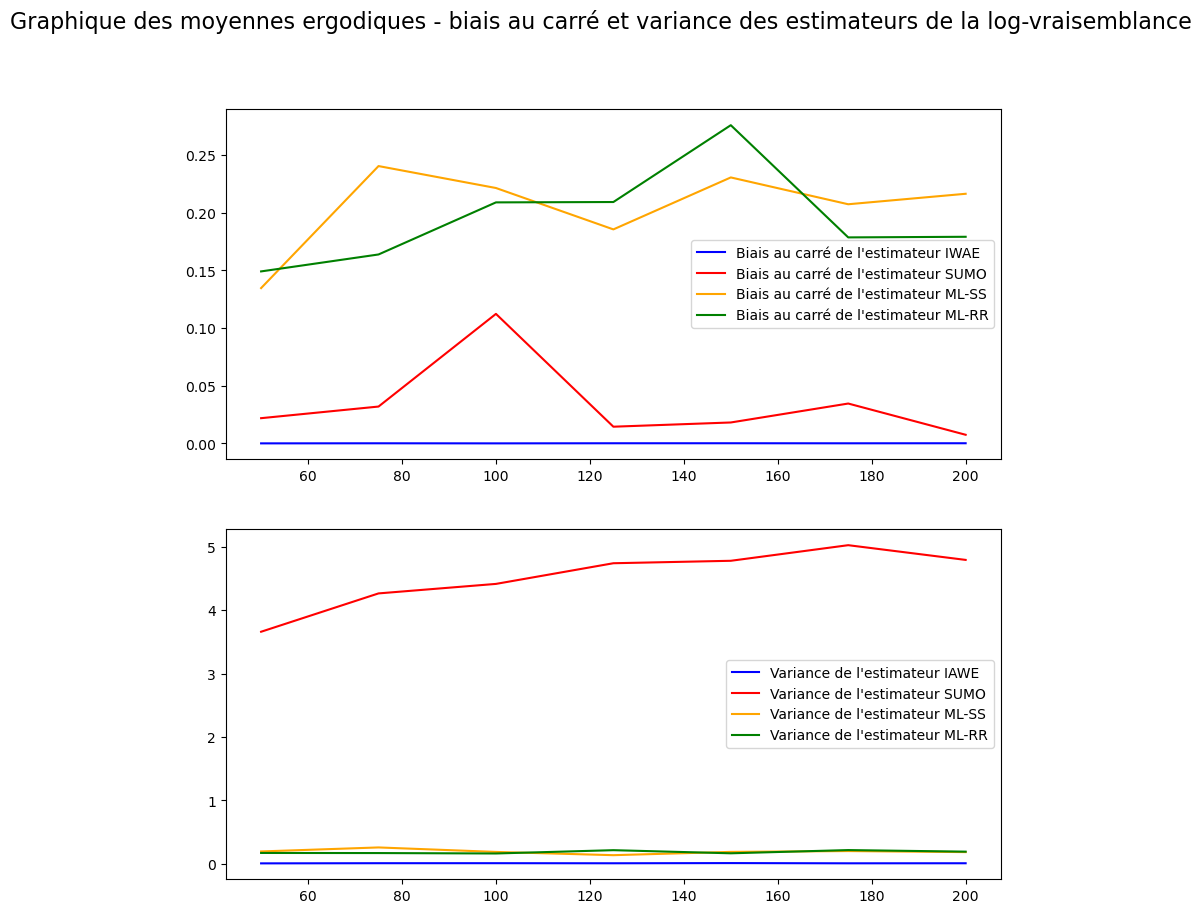

In [6]:
sorted_biais_IWAE_m = sorted(biais_IWAE_m.items())
sorted_biais_SUMO_m = sorted(biais_SUMO_m.items())
sorted_biais_SS_m = sorted(biais_SS_m.items())
sorted_biais_RR_m = sorted(biais_RR_m.items())

sorted_var_IWAE_m = sorted(var_IWAE_m.items())
sorted_var_SUMO_m = sorted(var_SUMO_m.items())
sorted_var_SS_m = sorted(var_SS_m.items())
sorted_var_RR_m = sorted(var_RR_m.items())

m, biais_IAWE = zip(*sorted_biais_IWAE_m)
m, biais_SUMO = zip(*sorted_biais_SUMO_m)
m, biais_SS = zip(*sorted_biais_SS_m)
m, biais_RR = zip(*sorted_biais_RR_m)

m, var_IAWE = zip(*sorted_var_IWAE_m) 
m, var_SUMO = zip(*sorted_var_SUMO_m) 
m, var_SS = zip(*sorted_var_SS_m) 
m, var_RR = zip(*sorted_var_RR_m) 

fig, axs = plt.subplots(2,1, figsize=(10, 10))

axs[0].plot(m, np.square(biais_IAWE), 'b', label="Biais au carré de l'estimateur IWAE", color="blue")
axs[0].plot(m, np.square(biais_SUMO), 'b', label="Biais au carré de l'estimateur SUMO", color="red")
axs[0].plot(m, np.square(biais_SS), 'b', label="Biais au carré de l'estimateur ML-SS", color="orange")
axs[0].plot(m, np.square(biais_RR), 'b', label="Biais au carré de l'estimateur ML-RR", color="green")

axs[0].legend()

fig.suptitle('Graphique des moyennes ergodiques - biais au carré et variance des estimateurs de la log-vraisemblance', fontsize=16)

axs[1].plot(m, var_IAWE, 'b', label="Variance de l'estimateur IAWE", color="blue")
axs[1].plot(m, var_SUMO, 'b', label="Variance de l'estimateur SUMO", color="red")
axs[1].plot(m, var_SS, 'b', label="Variance de l'estimateur ML-SS", color="orange")
axs[1].plot(m, var_RR, 'b', label="Variance de l'estimateur ML-RR", color="green")


axs[1].legend()

plt.show()

# Estimateurs du gradient de la log-vraisemblance

## Comparaison entre estimateurs et vrai gradient au point x

On estime le gradient de la  log-vraisemblance au point $\mathbf{x}$. On prend k=100 pour l'estimateur IAWE.

In [7]:
np.random.seed(589)
print("Vraie valeur du gradient de la log-vraisemblance au point x: {}".format(np.around(gradient_log_vraisemblance(x, theta), decimals=2)))
print("Estimateur IAWE du gradient de la log-vraisemblance: {}".format(np.around(importance_sampling_gradientlogvraisemblance(k=100, theta=theta, A=A, b=b, x=x), decimals=2)))
print("Estimateur SUMO du gradient de la log-vraisemblance: {}".format(np.around(estimateur_SUMO_gradientlogvraisemblance(theta=theta, A=A, b=b, x=x, r=0.6), decimals=2)))
print("Estimateur ML-SS du gradient de la log-vraisemblance: {}".format(np.around(estimateur_ML_SS_gradientlogvraisemblance(x, theta, A, b, r=0.6), decimals=2)))
print("Estimateur ML-RR du gradient de la log-vraisemblance: {}".format(np.around(estimateur_ML_RR_gradientlogvraisemblance(x, theta, A, b, r=0.6), decimals=2)))

Vraie valeur du gradient de la log-vraisemblance au point x: [  3.38 -21.3   -7.1   -0.71 -24.7  -15.92  -9.66  14.82  13.55 -19.09
   3.78  -3.77  20.2   13.08   1.94   0.7   -0.66  12.76  13.13   3.73]
Estimateur IAWE du gradient de la log-vraisemblance: [ 0.97 -5.27 -1.72 -0.14 -6.1  -3.95 -2.3   3.64  3.45 -4.8   0.9  -0.96
  5.02  3.36  0.38  0.1  -0.24  3.39  3.28  0.9 ]
Estimateur SUMO du gradient de la log-vraisemblance: [  0.34  -8.34  -3.94  -1.95 -13.    -6.15  -4.79   6.5    6.25  -7.4
   0.26  -2.58  11.35   6.59   0.99   0.32  -2.79   6.88   6.36  -0.  ]
Estimateur ML-SS du gradient de la log-vraisemblance: [ 0.51 -5.69 -0.48  1.28 -6.24 -4.49 -1.69  4.75  3.17 -5.71  1.3  -1.62
  4.73  3.28  0.72  0.18  1.07  3.57  2.92  0.52]
Estimateur ML-RR du gradient de la log-vraisemblance: [ 1.07 -4.92 -2.02 -0.37 -6.3  -3.78 -2.65  4.42  3.6  -4.16  1.6  -1.14
  4.95  3.58  1.07  0.67 -0.42  3.4   3.82  0.74]


## Procédure de Monte Carlo

Le gradient de la log-vraisemblance ainsi que les différents estimateurs associés sont dans $\mathbb{R}^{20}$. Ainsi, on adapte la définition du biais au carré et de la variance, de sorte à avoir une valeur réelle.

\begin{equation}

    biais_M=\frac{1}{M} \sum_{m=1}^{M} estimateur_m - \nabla_{\theta}l(x;\theta)

\end{equation}

\begin{equation}

    biais^2_M=\lVert biais_M \rVert^2

\end{equation}

\begin{equation}

    Var_M=\frac{1}{M} \sum_{m=1}^{M} \lVert estimateur_m - \frac{1}{M} \sum_{m=1}^{M} estimateur_m \rVert^{2}

\end{equation}

On prend $k=100$ pour l'estimateur IWAE.

In [8]:
def procedure_MC_gradient(M, k, x, theta, A, b):
    m=0
    estimations_IWAE=np.array([])
    estimations_SUMO=np.array([])
    estimations_SS=np.array([])
    estimations_RR=np.array([])


    while m<M:
        gradient_log_vraisemblance_estim_IWAE=importance_sampling_gradientlogvraisemblance(k=k, theta=theta, A=A, b=b, x=x)
        gradient_log_vraisemblance_estim_SUMO=estimateur_SUMO_gradientlogvraisemblance(theta=theta, A=A, b=b, x=x, r=0.6)
        gradient_log_vraisemblance_estim_SS=estimateur_ML_SS_gradientlogvraisemblance(theta=theta, A=A, b=b, x=x, r=0.6)
        gradient_log_vraisemblance_estim_RR=estimateur_ML_RR_gradientlogvraisemblance(theta=theta, A=A, b=b, x=x, r=0.6)

        if m==0:
            estimations_IWAE= np.append(estimations_IWAE, gradient_log_vraisemblance_estim_IWAE)
            estimations_SUMO=np.append(estimations_SUMO, gradient_log_vraisemblance_estim_SUMO)
            estimations_SS=np.append(estimations_SS, gradient_log_vraisemblance_estim_SS)
            estimations_RR=np.append(estimations_RR, gradient_log_vraisemblance_estim_RR)
        
        else:
            estimations_IWAE= np.vstack((estimations_IWAE, gradient_log_vraisemblance_estim_IWAE))
            estimations_SUMO=np.vstack((estimations_SUMO, gradient_log_vraisemblance_estim_SUMO))
            estimations_SS=np.vstack((estimations_SS, gradient_log_vraisemblance_estim_SS))
            estimations_RR=np.vstack((estimations_RR, gradient_log_vraisemblance_estim_RR))
        m+=1
    
    biais_IWAE_M=np.mean(estimations_IWAE, axis=0)-gradient_log_vraisemblance(x=x, theta=theta)
    biais_SUMO_M=np.mean(estimations_SUMO, axis=0)-gradient_log_vraisemblance(x=x, theta=theta)
    biais_SS_M=np.mean(estimations_SS, axis=0)-gradient_log_vraisemblance(x=x, theta=theta)
    biais_RR_M=np.mean(estimations_RR, axis=0)-gradient_log_vraisemblance(x=x, theta=theta)

    squared_biais_IWAE_M=norm(biais_IWAE_M)**2
    squared_biais_SUMO_M=norm(biais_SUMO_M)**2
    squared_biais_SS_M=norm(biais_SS_M)**2
    squared_biais_RR_M=norm(biais_RR_M)**2

    var_IWAE_M=np.mean(norm(estimations_IWAE-np.mean(estimations_IWAE, axis=0)))
    var_SUMO_M=np.mean(norm(estimations_SUMO-np.mean(estimations_SUMO, axis=0)))
    var_SS_M=np.mean(norm(estimations_SS-np.mean(estimations_SS, axis=0)))
    var_RR_M=np.mean(norm(estimations_RR-np.mean(estimations_RR, axis=0)))


    return squared_biais_IWAE_M, squared_biais_SUMO_M, squared_biais_SS_M, squared_biais_RR_M, var_IWAE_M, var_SUMO_M, var_SS_M, var_RR_M

On teste la procédure avec $M=50, 75, 100, 125, 150, 175, 200$. Plus M est grand, plus les estimateurs du biais et de la variance sont précis (passé $M >150,200$, la précision n'augmente plus significativement, généralement).

In [9]:
np.random.seed(8554)

choix_M=np.arange(50,225, 25)

squared_biais_IWAE_m={}
squared_biais_SUMO_m={}
squared_biais_SS_m={}
squared_biais_RR_m={}

var_IWAE_m={}
var_SUMO_m={}
var_SS_m={}
var_RR_m={}

for m in choix_M:
    res=procedure_MC_gradient(M=m, k=100, x=x, theta=theta, A=A, b=b)
    
    squared_biais_IWAE_m[m]=res[0]
    squared_biais_SUMO_m[m]=res[1]
    squared_biais_SS_m[m]=res[2]
    squared_biais_RR_m[m]=res[3]

    var_IWAE_m[m]=res[4]
    var_SUMO_m[m]=res[5]
    var_SS_m[m]=res[6]
    var_RR_m[m]=res[7]


C:\Users\yanis\AppData\Local\Temp\ipykernel_64196\2386538657.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  axs[0].plot(m, biais_IAWE, 'b', label="Biais au carré de l'estimateur IWAE", color="blue")
C:\Users\yanis\AppData\Local\Temp\ipykernel_64196\2386538657.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  axs[0].plot(m, biais_SUMO, 'b', label="Biais au carré de l'estimateur SUMO", color="red")
C:\Users\yanis\AppData\Local\Temp\ipykernel_64196\2386538657.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  axs[0].plot(m, biais_SS, 'b', label="Biais au carré de l'estimateur ML-SS", color="orange")
C:\U

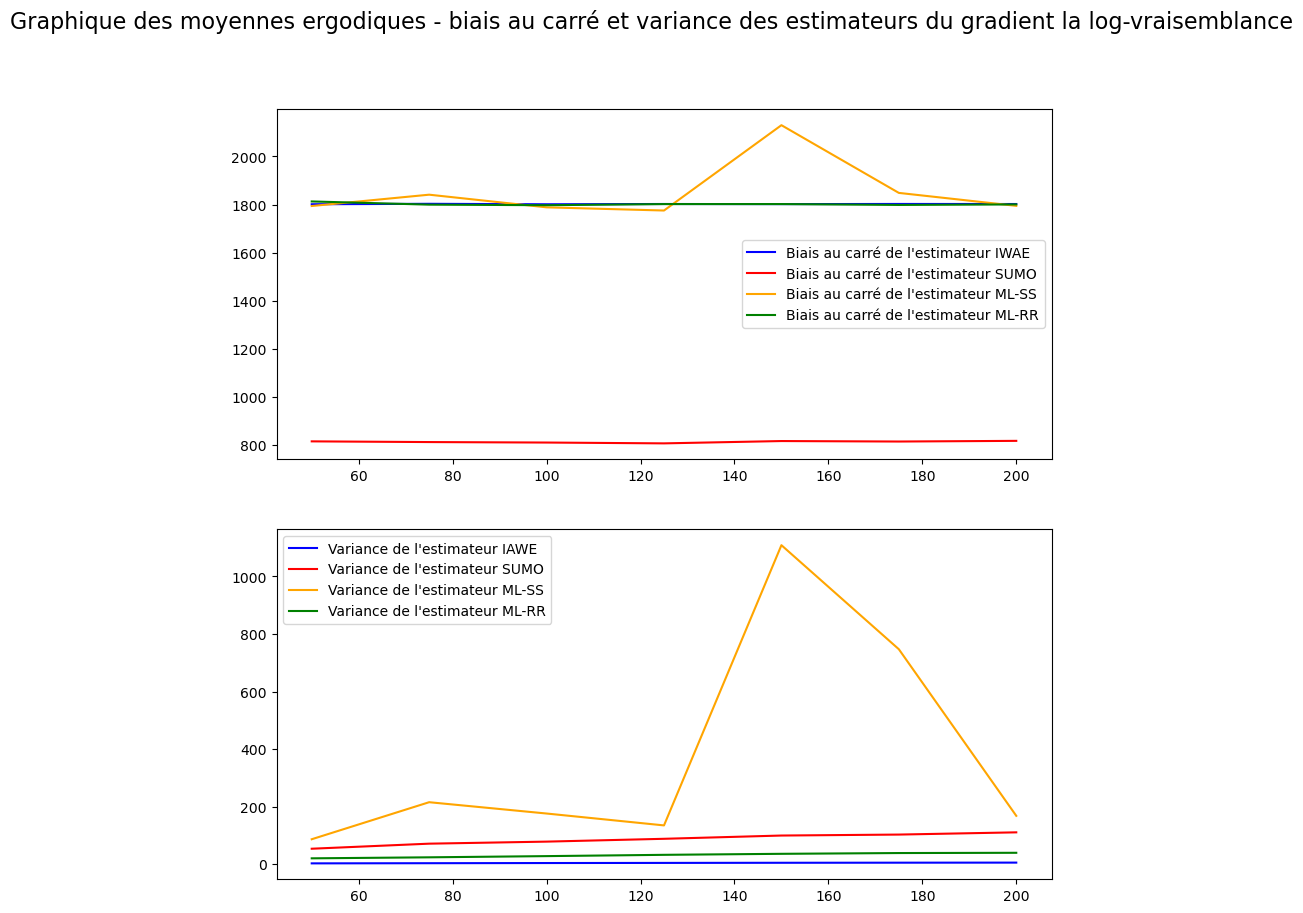

In [10]:
sorted_biais_IWAE_m = sorted(squared_biais_IWAE_m.items())
sorted_biais_SUMO_m = sorted(squared_biais_SUMO_m.items())
sorted_biais_SS_m = sorted(squared_biais_SS_m.items())
sorted_biais_RR_m = sorted(squared_biais_RR_m.items())

sorted_var_IWAE_m = sorted(var_IWAE_m.items())
sorted_var_SUMO_m = sorted(var_SUMO_m.items())
sorted_var_SS_m = sorted(var_SS_m.items())
sorted_var_RR_m = sorted(var_RR_m.items())

m, biais_IAWE = zip(*sorted_biais_IWAE_m)
m, biais_SUMO = zip(*sorted_biais_SUMO_m)
m, biais_SS = zip(*sorted_biais_SS_m)
m, biais_RR = zip(*sorted_biais_RR_m)

m, var_IAWE = zip(*sorted_var_IWAE_m) 
m, var_SUMO = zip(*sorted_var_SUMO_m) 
m, var_SS = zip(*sorted_var_SS_m) 
m, var_RR = zip(*sorted_var_RR_m) 

fig, axs = plt.subplots(2,1, figsize=(10, 10))

axs[0].plot(m, biais_IAWE, 'b', label="Biais au carré de l'estimateur IWAE", color="blue")
axs[0].plot(m, biais_SUMO, 'b', label="Biais au carré de l'estimateur SUMO", color="red")
axs[0].plot(m, biais_SS, 'b', label="Biais au carré de l'estimateur ML-SS", color="orange")
axs[0].plot(m, biais_RR, 'b', label="Biais au carré de l'estimateur ML-RR", color="green")

axs[0].legend()

fig.suptitle('Graphique des moyennes ergodiques - biais au carré et variance des estimateurs du gradient la log-vraisemblance', fontsize=16)

axs[1].plot(m, var_IAWE, 'b', label="Variance de l'estimateur IAWE", color="blue")
axs[1].plot(m, var_SUMO, 'b', label="Variance de l'estimateur SUMO", color="red")
axs[1].plot(m, var_SS, 'b', label="Variance de l'estimateur ML-SS", color="orange")
axs[1].plot(m, var_RR, 'b', label="Variance de l'estimateur ML-RR", color="green")


axs[1].legend()

plt.show()